In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

2023-10-28 09:45:51.098673: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 09:45:51.134835: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 09:45:51.134869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 09:45:51.134884: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 09:45:51.143349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-28 09:45:51.144402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### Wczytanie danych

In [13]:
iris = load_iris()
X = iris.data
y = iris.target

### Wyznaczenie zbiorów danych

In [35]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Przygotowanie danych do modelu
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Definicja modelu

In [36]:
# Tworzenie modelu sieci neuronowej (MLP)
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Warstwa wyjściowa z aktywacją softmax dla problemu wieloklasowego

### Kompilacja

In [37]:
# Kompilacja modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Trening

In [38]:
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50


12/12 [==============================] - 1s 11ms/step - loss: 1.2881 - accuracy: 0.0000e+00 - val_loss: 1.2073 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 1.2318 - accuracy: 0.0083 - val_loss: 1.1969 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1805 - accuracy: 0.0250 - val_loss: 1.1788 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1433 - accuracy: 0.1250 - val_loss: 1.1635 - val_accuracy: 0.0667
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 1.1126 - accuracy: 0.2167 - val_loss: 1.1409 - val_accuracy: 0.1667
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0925 - accuracy: 0.3583 - val_loss: 1.1278 - val_accuracy: 0.2000
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.4833 - val_loss: 1.1168 - val_accuracy: 0.3000
Epoch 8/50
12/

### Wizualizacja

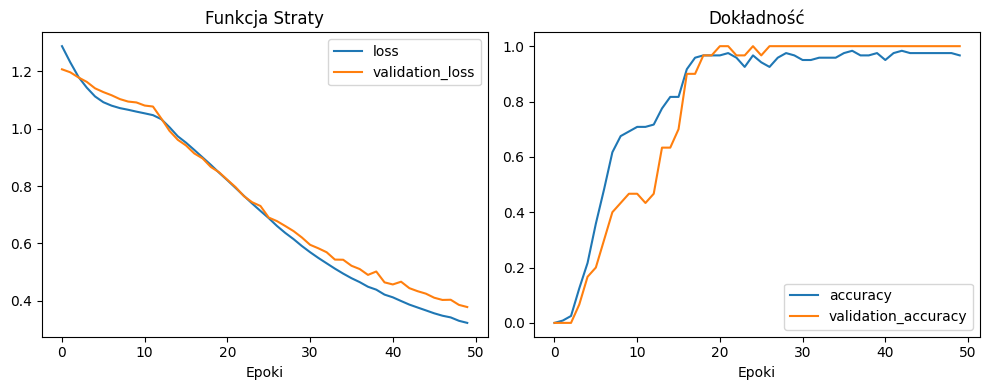

In [39]:
# Wizualizacja funkcji straty i dokładności
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Funkcja Straty')
plt.xlabel('Epoki')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Dokładność')
plt.xlabel('Epoki')
plt.legend()

plt.tight_layout()
plt.show()